In [1]:
# To enable plotting graphs in Jupyter Notebook

%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

#import logistic regression machine learning library

from sklearn import metrics

In [7]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']



pima_df = pd.read_csv('pima-indians-diabetes.csv', names = colnames)

In [10]:
pima_df.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Let's check the dataset for invalide data points like "?"

#### We use np.isreal-- a numpy function which checks each column for each row and returns a bool array,
#### where True if input element is real. 
#### applymap is pandas dataframe function that applies the np.isreal function columnwise.

### Following line selects those rows which have some non-numeric value in any of the columns hence ~ symbol

In [11]:
pima_df[~pima_df.applymap(np.isreal).all(1)]

,preg,plas,pres,skin,test,mass,pedi,age,class


# Replacing invalid data points with median values.


In [12]:
# We do not need to specify the column names every column's missing value is replaces with that column's median respectively

# pima_df = pima_df.fillna(pima_df.median())
#pima_df

In [13]:
# Let's analyze the distribution of the various attributes

pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Let's check the distribution of our data

### We need to address outliers and missing values

### So, first, let's see how many records we have for each "class" in the dataset...0 non-diabetic; 1 diabet

In [14]:
pima_df.groupby(["class"]).count()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [16]:
#### Above we see that are twice as many 0's as there are 1's. The ratio of 0 to 1 is almost 2:1. 
#### Therefore, the ability of the model to predict class 0 will be better than its ability to predict class 1. However, 
#### the objective is the reverse-- we want to predict 1's--i.e. the probability of predicting 1's. 

## Let's do a corrleation analysis among the different dimensions and also each dimension with the dependent dimension.
#### This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimesions.
#### The result can be stored as a .png file and opened in say, paint to get a larger view.

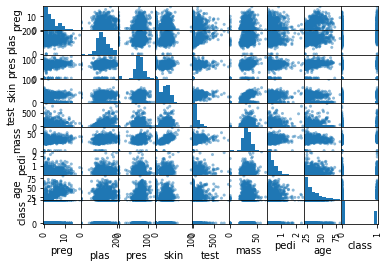

In [25]:
pima_df_attr = pima_df.iloc[:, 0:9]

axes = pd.plotting.scatter_matrix(pima_df_attr)
#plt.savefig('c:\Users\alimojadam\Documents\Python Directory\pima_pairpanel.png')

C:\Users\alimojadam\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\alimojadam\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


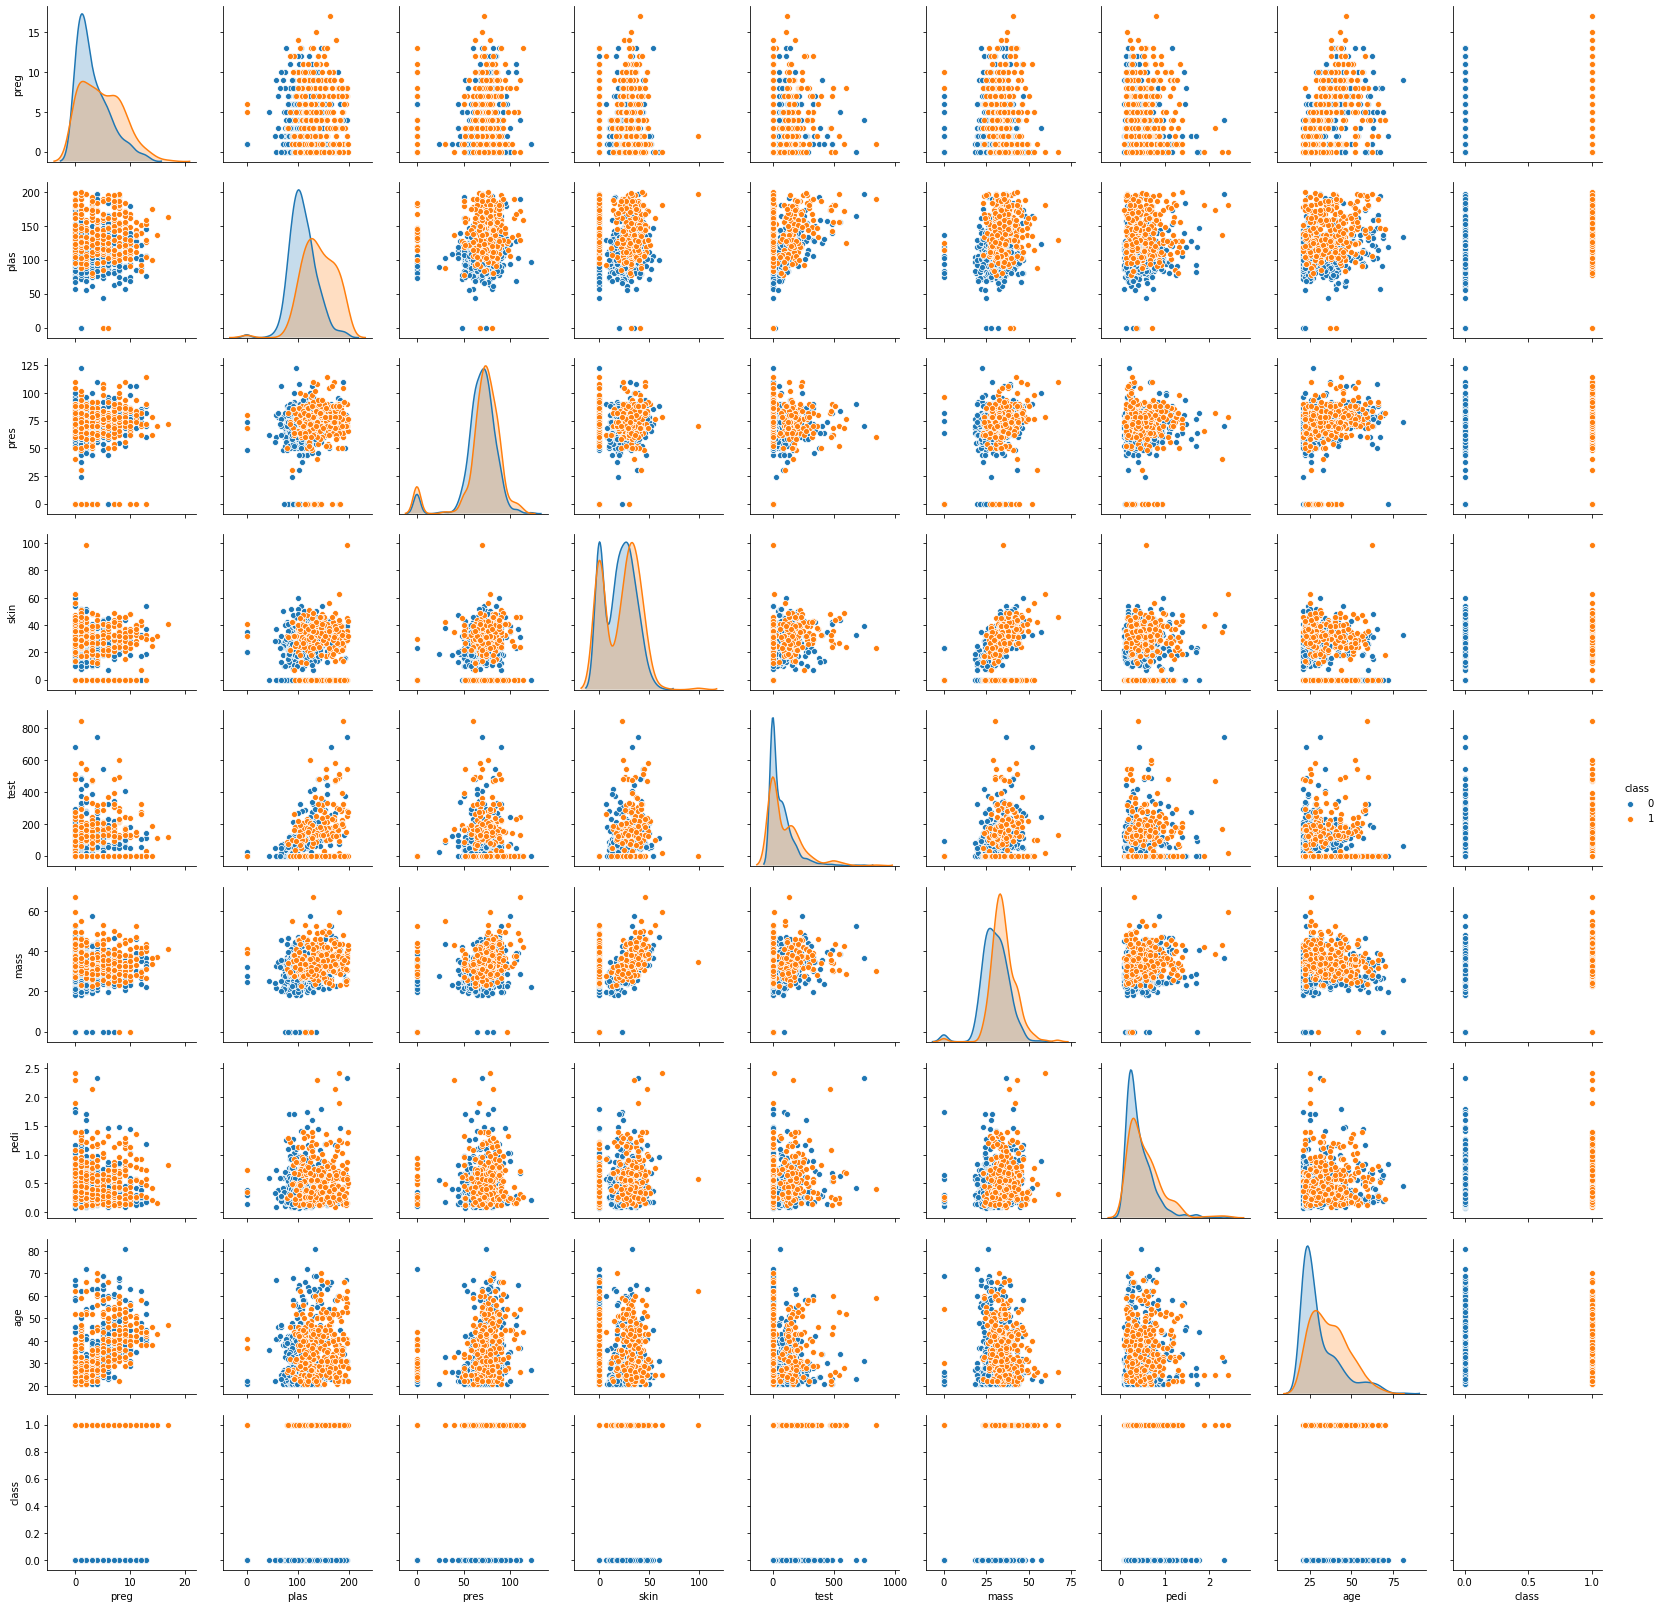

In [29]:
# Pairplot using sns

import seaborn as sns

# all data are numerical that's why using 'diag_kind = 'kde'' makes sense.
# 'hue' is equal to that last attribute (last row = class).b
sns.pairplot(pima_df, diag_kind = 'kde', hue =  'class')

## As can be seen along the diagaonal line above: The distrubtion of all column data are almost the same for both diabatic and nondiabetic patients.
# Blue distributions almost fully overlap orange distribution across all dimensions for both classes

#### The data for all attributes are skewed, especially for the variable "test"

#### For "test" the mean is ~ 80 while the median is 30.5 which clearly indicattes an extreme long tail on the right

#### Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution. 

#### There is no obvious relationship between age and onset of diabetes.

In [32]:
# Now, let's prepare our data for a logistic model by splitting them into Training and Testing datasets

In [44]:
array = pima_df.values

X = array[ : , 0:7] # ALL INDEPENDENT VARIABLES : select all rows and first 8 columns which are the attributes
Y = array[ : , 8] # DEPENDENT VARIABLE : select all rows and the 8th column which is the classification "Yes", "No" for diabetes
test_size = 0.30  # taking 70:30 training and test set

seed = 7  # Random number seeding for repeatability of the code

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)
type(X_train)

numpy.ndarray

# Logistic Regression Model

In [64]:
# Fit the model on 30%
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(metrics.confusion_matrix(y_test, y_predict))


[[132  15]
 [ 38  46]]


C:\Users\alimojadam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
### the confusion matrix above shows that there higher accuracy in predicting the Non-Diabetic using this model
### (132/(132 + 15)) ~ 90%
### whereas the diabetic outcome is predicted with only 55% accuracy (46/(38+46))
### Overall the accuracy of the model is 77% (132+46) / (132+15+38+46)

##### Analyzing the confusion matrix

#### True Positives (TP): We correctly predicted that they do have diabetes 46
#### True Negatives (TN): We correctly predicted that they do not have diabetes 132
#### False Positives (FP): We incorrectly predicted that they do not have diabetes 38
#### False Negatives (FN): We incorrectly predicted that they do have diabetes 15

In [65]:
model_score = model.score(X_test, y_test)
print(model_score)


0.7705627705627706


In [66]:
 %matplotlib inline

In [67]:
import numpy as np
import pandas as pd
from sklearn import metrics

In [68]:
from sklearn.naive_bayes import GaussianNB

In [103]:
wine_df = pd.read_csv('wine.csv', names = ['Cultivator', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash', 'Magnesium', 'Total_phenols', 'Falvanoids', 'Nonflavanoid_phenols', 'Proanthorcyanins', 'Color_intensity', 'Hue', 'OD280', 'Proline'])

In [104]:
wine_df.head().transpose()

,0,1,2,3,4
Cultivator,1.00,1.00,1.00,1.00,1.00
Alcohol,14.23,13.20,13.16,14.37,13.24
Malic_Acid,1.71,1.78,2.36,1.95,2.59
Ash,2.43,2.14,2.67,2.50,2.87
Alcalinity_of_Ash,15.60,11.20,18.60,16.80,21.00
Magnesium,127.00,100.00,101.00,113.00,118.00
Total_phenols,2.80,2.65,2.80,3.85,2.80
Falvanoids,3.06,2.76,3.24,3.49,2.69
Nonflavanoid_phenols,0.28,0.26,0.30,0.24,0.39
Proanthorcyanins,2.29,1.28,2.81,2.18,1.82


In [105]:
# Summary Statistics

wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthorcyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [106]:
wine_df.head(10)

,Cultivator,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthorcyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [107]:
wine_df.shape

(178, 14)

In [108]:
wine_df.info()  # many columns are of the type 'object' i.e. strings. These need to be converted to the correct type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Cultivator              178 non-null int64
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity_of_Ash       178 non-null float64
Magnesium               178 non-null int64
Total_phenols           178 non-null float64
Falvanoids              178 non-null float64
Nonflavanoid_phenols    178 non-null float64
Proanthorcyanins        178 non-null float64
Color_intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


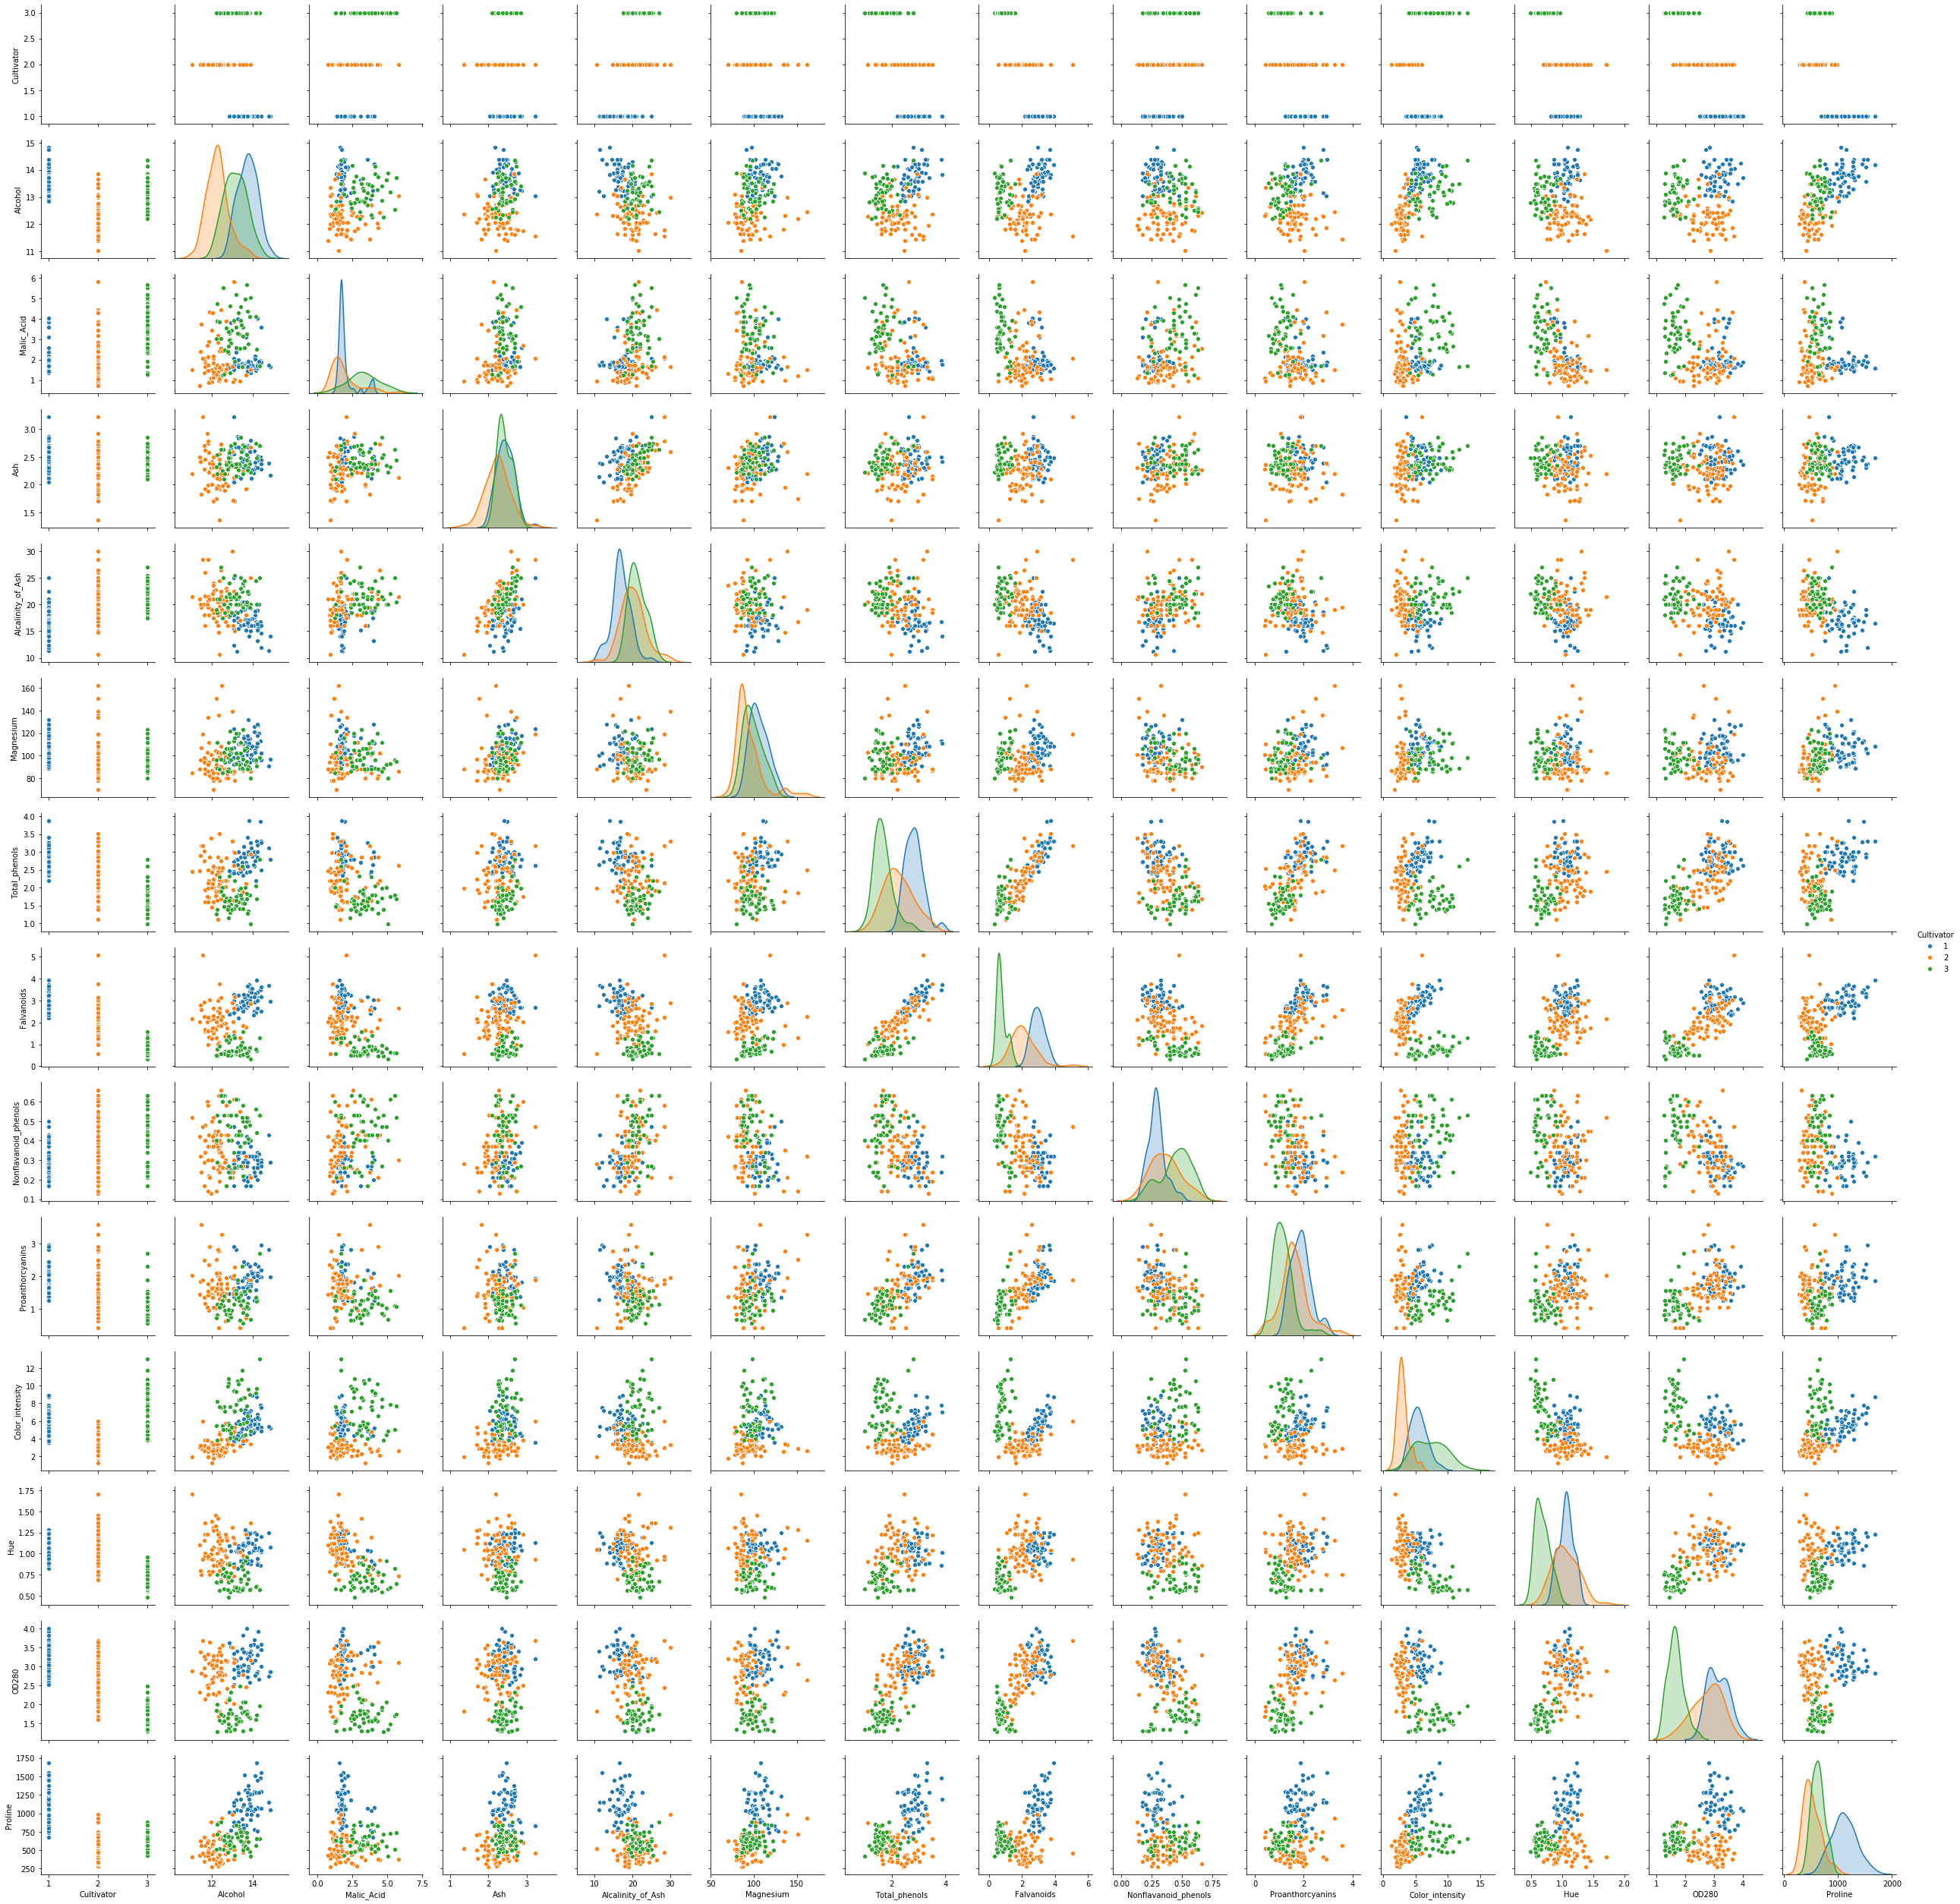

In [109]:
# Checking the distribution of data points in each column

import seaborn as sns

sns.pairplot(wine_df, diag_kind= 'kde', hue = 'Cultivator') # 'Cultivator' isour dependent/target variable.

##### 3 curves because there are 3 classes of wine.
### separate means values for each class is significant distinguishing factor in being able to separate the classes.

### For example, 'Ash' is not a good predictor because all three classes are overlapping and their means are almost the same.

In [123]:
# Splitting the data into training and testing sets for independent attributes

from sklearn.model_selection import train_test_split

X = wine_df.drop("Cultivator", axis = 1)
Y = wine_df.drop("Cultivator")


KeyError: "['Cultivator'] not found in axis"

In [118]:
X.head()

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthorcyanins,Color_intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [126]:
train_set, test_set, train_labels, test_labels = train_test_split(X, Y, test_size = 0.3, random_state = 1)

# Naive Bayes Model

In [128]:
# Invoking the Naive Bayes Gaussian function to create the model
# fitting the model in the training data set

model = GaussianNB()
model.fit(train_set, train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [130]:
model.score(train_set, train_labels)  # performance on test data

0.9758064516129032

# Running the Naive Bayes Model on the test data

In [134]:
test_pred = model.predict(test_set)


print(metrics.classification_report(test_labels, test_pred))


              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [135]:
print(metrics.confusion_matrix(test_labels, test_pred))

[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]
